# Generate Toy Data

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import random
n_samples = 1000
n_features = 2
dims = 41
# centers = [[10]*dims, [-5]*dims, [7]*dims, [30]*dims, [-11]*dims]
cstd=0.4

centers = list()
for i in range(0,10):
    centers.append([random.randint(-1,1) for x in range(dims)])

    
X, labels_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cstd)
# X = StandardScaler().fit_transform(X)

# Reduce Dimension

In [2]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)

# Plt Data w/ True Labels

/Users/lsxliron/.virtualenvs/bigdata/lib/python2.7/site-packages/matplotlib/lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


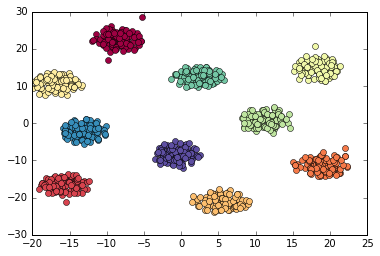

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt



# pca = PCA(n_components=2)
# pca.fit(X)
# z = pca.transform(X) 


# X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')[0:1000]

labels = labels_true
core_samples_mask = np.zeros_like(labels_true, dtype=bool)
core_sample_indices = np.arange(n_samples)
core_samples_mask[core_sample_indices] = True
# labels = db.labels_



# # Black removed and is used for noise instead.
unique_labels = set(labels_true)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.xlim([-15,15])
# plt.ylim([-15,15])
plt.show()

# Perform DBSCAN and Plot Data w/ DBSCAN labels

CPU times: user 174 ms, sys: 7.04 ms, total: 181 ms
Wall time: 181 ms


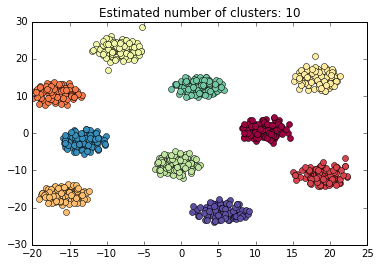

In [8]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Compute DBSCAN
%time db = DBSCAN(eps=5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Reduce dimensions
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

##############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [250]:
np.linalg.norm(np.array(centers[6])-np.array(centers[5]))

8.8881944173155887

# Using Annoy

In [4]:
from annoy import AnnoyIndex
from sklearn.cluster import DBSCAN
t = None
t = AnnoyIndex(dims, metric="euclidean")
for i in xrange(0,len(X)):
    t.add_item(i, X[i])

t.build(25)
n_neighbors = 60
r=7.31
# tempnns = [np.array(t.get_nns_by_item(i, n_neighbors), dtype=np.int64) for i in xrange(0,len(X))]
%time tempnns = [np.array([j[0] for j in zip(*(t.get_nns_by_item(i,n_neighbors,include_distances=True))) if j[1]<r],dtype=np.int64) for i in xrange(0,len(X))]
tempnns[len(tempnns)-1] = tempnns[len(tempnns)-1][:-1]
neighborhoods = np.array(tempnns, dtype=object)

model = {'neighborhoods':neighborhoods}

print "Done\nClustering"
%time db = DBSCAN(eps=0.000001, min_samples=7, algorithm="LSH", lshModel=model).fit(X)
print "Finished"
print "unique labels: {}".format(set(db.labels_))
print "NOISE: {}".format(db.labels_.tolist().count(-1))

CPU times: user 124 ms, sys: 4.57 ms, total: 128 ms
Wall time: 132 ms
Done
Clustering
CPU times: user 2.05 ms, sys: 413 µs, total: 2.46 ms
Wall time: 2.32 ms
Finished
unique labels: set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
NOISE: 0


In [252]:
np.linalg.norm(np.array(centers[8])-np.array(centers[1]))

8.2462112512353212

# DBSCAN with Annoy

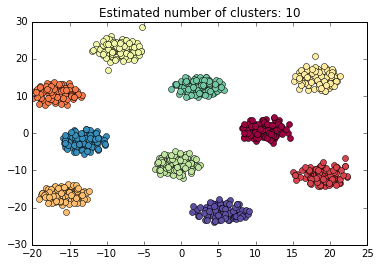

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Reduce dimensions
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)




# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Real Data

In [175]:
import numpy as np
from sklearn.cluster import DBSCAN
import bcolz as bc
from annoy import AnnoyIndex
import sys

start = 0
X = bc.open('/Users/lsxliron/Desktop/Fortran_INP-FLUX/y2009R','r')#[start:start+204476]
# X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')
t=None
dims=41
t = AnnoyIndex(dims, metric="euclidean")

LOAD = False
SAVE  = True

if not LOAD:
    print "Adding Vectors"
    for i in xrange(0,len(X)):
#         if i%1000 == 0:
#             print i
        t.add_item(i, X[i])

    print "Building trees"
    t.build(25)
    print "Done building"
    
    if SAVE:
        t.save('/Users/lsxliron/Desktop/Untitled Folder/anns/2009Full.ann')
else:
    t.load('/Users/lsxliron/Desktop/Untitled Folder/anns/2009Full.ann')

n_neighbors = 500
r=15
# # OPTIMIZED
print "Performing Queries"
%time tempnns = [np.array([j[0] for j in zip(*(t.get_nns_by_item(i,n_neighbors,include_distances=True))) if j[1]<r],dtype=np.int64) for i in xrange(0,len(X))]
# print "Done\n"
# # tempnns=list()
# # for i in range(0,len(X)):
# #     ind, dist = t.get_nns_by_item(i, n_neighbors, include_distances=True)
# #     temp = [ind[i] for i in xrange(len(ind)) if dist[i]<r]
# #     tempnns.append(np.array(temp, dtype=np.int64))
    

tempnns[len(tempnns)-1] = tempnns[len(tempnns)-1][:-1]
neighborhoods = np.array(tempnns, dtype=object)
lshModel = {'neighborhoods':neighborhoods}
# t.unload()
# del t


print "Done\nClustering"
%time db = DBSCAN(eps=r, min_samples=20, algorithm="LSH", lshModel=lshModel, random_state=42).fit(X)
print "Finished"
unique = set(db.labels_)
print "Total Clusters: {}".format(len(unique))
print "unique labels: {}".format(unique)

for item in unique:
    print "Cluster {} has {} members".format(item, db.labels_.tolist().count(item))
# sendSMS("DONE")

Adding Vectors
Building trees
Done building
Performing Queries
CPU times: user 53min 9s, sys: 36 s, total: 53min 45s
Wall time: 54min 56s
Done
Clustering


/Users/lsxliron/.virtualenvs/bigdata/lib/python2.7/site-packages/sklearn/cluster/dbscan_.py:117: DeprecationWarning: The parameter random_state is deprecated in 0.16 and will be removed in version 0.18. DBSCAN is deterministic except for rare border cases.
  category=DeprecationWarning)


CPU times: user 1min 7s, sys: 4min 16s, total: 5min 23s
Wall time: 15min 52s
Finished
Total Clusters: 44
unique labels: set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, -1])
Cluster 0 has 15296 members
Cluster 1 has 17610 members
Cluster 2 has 28493 members
Cluster 3 has 5037 members
Cluster 4 has 1990983 members
Cluster 5 has 171839 members
Cluster 6 has 98832 members
Cluster 7 has 61020 members
Cluster 8 has 6342 members
Cluster 9 has 5817 members
Cluster 10 has 1776 members
Cluster 11 has 65 members
Cluster 12 has 137 members
Cluster 13 has 1 members
Cluster 14 has 17 members
Cluster 15 has 1 members
Cluster 16 has 1 members
Cluster 17 has 68 members
Cluster 18 has 1 members
Cluster 19 has 1 members
Cluster 20 has 1 members
Cluster 21 has 1 members
Cluster 22 has 1 members
Cluster 23 has 1 members
Cluster 24 has 1 members
Cluster 25 has 42 members
Cluster 26 has 16 m

 
# Plot Real Data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
fig = plt.figure(figsize=(12, 12), dpi=100)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Reduce dimensions
print "Reducing..."
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)
# try:
#     filename = "Jan2005TSNE10KG20R0-05.npy"
#     np.save(filename, z)
# except:
#     pass
print "Done Reduction\nPlotting"

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)




# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Statistical Plotting

In [4]:
import numpy as np
from math import ceil
# np.load('Jan2005TSNE10KG20R0-05.npy')
totalPoints = float(len(X))#50000.0
unique_labels = set(db.labels_)
orig_clusters = list()
for lb in unique_labels:
    orig_clusters.append(db.labels_.tolist().count(lb)/totalPoints)

totalPointInGraph = [int(x*10000) for x in orig_clusters]
pointsIndexesToPlot = list()
pointsLabelsToPlot = list()
for i,c in zip(xrange(len(unique_labels)), unique_labels):
    cluster_indexes = np.where(db.labels_ == c)[0]
    points = np.random.choice(cluster_indexes, size=totalPointInGraph[i])
    pointsIndexesToPlot.extend(points)
    pointsLabelsToPlot.extend([c]*totalPointInGraph[i])


finalPointsToPlot = np.array([X[i] for i in pointsIndexesToPlot])

In [16]:
# mmm=np.array(pointsLabelsToPlot)
# np.where(mmm==2)
# z[9990:9998]
totalPointInGraph

[37, 28, 32, 22, 14, 4305, 8, 5, 279, 130, 50, 9, 5, 7, 68]

Reducing...


/Users/lsxliron/.virtualenvs/bigdata/lib/python2.7/site-packages/matplotlib/lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


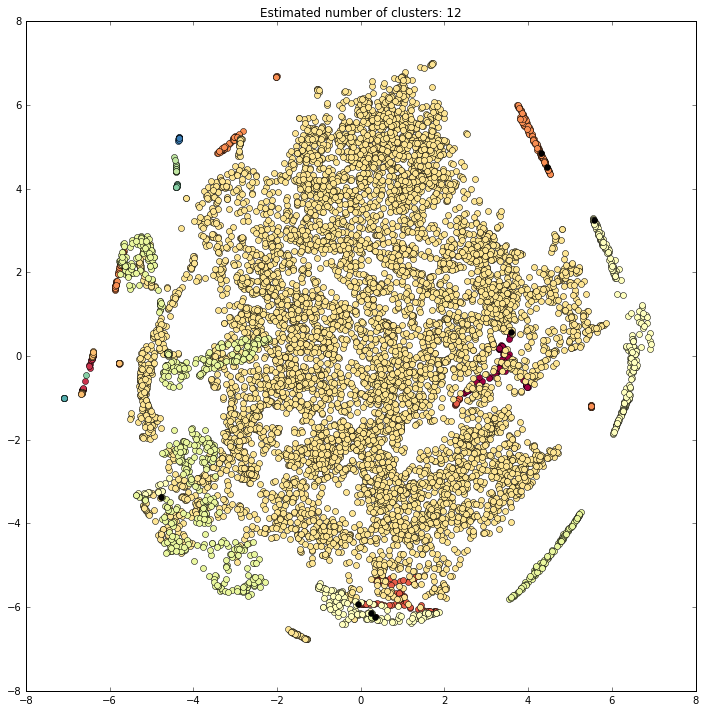

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

fig = plt.figure(figsize=(12, 12), dpi=100)

core_samples_mask = np.zeros_like(pointsLabelsToPlot, dtype=bool)
core_samples_mask[np.arange(len(finalPointsToPlot))] = True
labels = pointsLabelsToPlot

print "Reducing..."
model = TSNE(n_components=3, random_state=0)#, metric='manhattan')
z = model.fit_transform(finalPointsToPlot)



# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# z=finalPointsToPlot



# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1],'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1],'.', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 3D Plotting

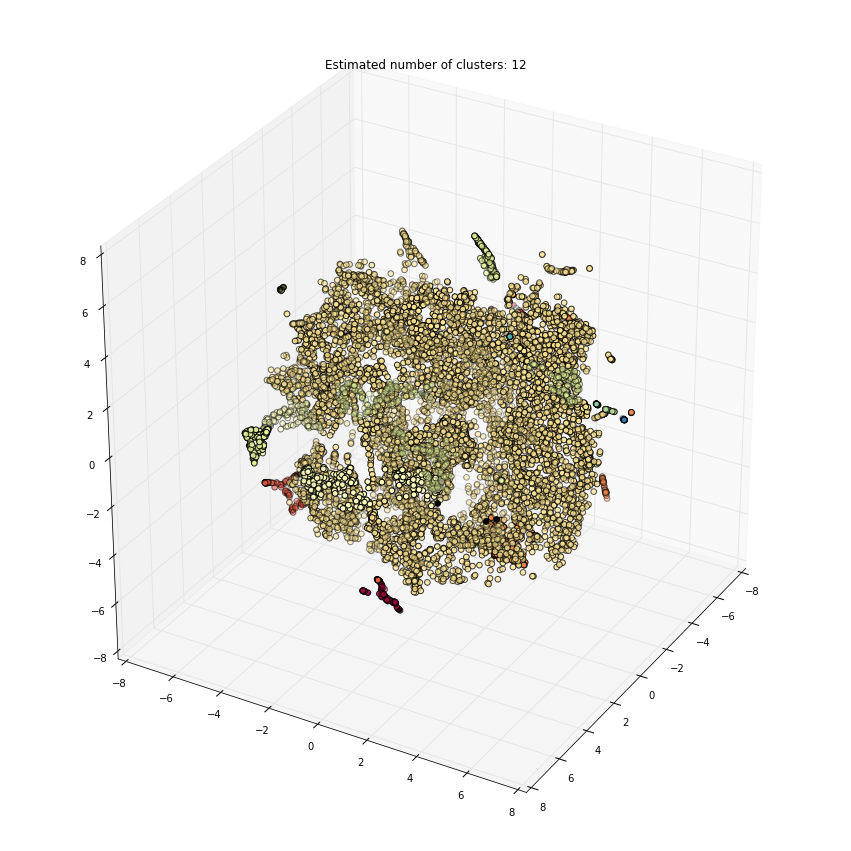

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15), dpi=100)
ax = fig.add_subplot(111, projection='3d')

core_samples_mask = np.zeros_like(pointsLabelsToPlot, dtype=bool)
core_samples_mask[np.arange(len(finalPointsToPlot))] = True
labels = pointsLabelsToPlot

# print "Reducing..."
# model = TSNE(n_components=3, random_state=0)
# z = model.fit_transform(finalPointsToPlot)



# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# z=finalPointsToPlot



# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2],'o', c=col, s=32)

    xy = z[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], '.', c=col,s=32)

plt.title('Estimated number of clusters: %d' % n_clusters_)
ax.view_init(azim=30)
plt.show()

# PlotLy Test

In [5]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

py.sign_in('lsxliron', 'cutjnhz00h')

# xy = z[class_member_mask & core_samples_mask]
zz=np.array([z[j] for j in xrange(len(pointsLabelsToPlot)) if pointsLabelsToPlot[j] not in  [-1]])
c=list()
# c.extend([0]*1500)
# c.extend([10]*1500)
# c.extend([20]*2000)
trace1 = go.Scatter3d(
    x=zz[:,0],
    y=zz[:,1],
    z=zz[:,2],
    text=["Pt. ID: {}".format(i) for i in pointsIndexesToPlot],
    mode='markers',
    marker=dict(size=3, 
                color=[db.labels_[l] for l in pointsIndexesToPlot],
                colorscale='Viridis', 
                opacity=0.6)
)

data = [trace1]

layout = go.Layout(
    margin=dict(
        l=0,
        b=0,
        r=0,
        t=0
    )
)

figg = go.Figure(data=data, layout=layout)
py.iplot(figg, filename='2005-10K')

In [110]:
colors = ['mediumaquamarine',
 'darkolivegreen',
 'cyan',
 'lightgreen',
 'lavender',
 'mediumblue',
 'crimson',
 'fuchsia',
 'lightsteelblue',
 'cornflowerblue',
 'darkseagreen',
 'lightskyblue',
 'maroon',
 'lightpink',
 'coral',
 'darkred',
 'darkmagenta',
 'cadetblue',
 'blueviolet',
 'darksalmon',
 'burlywood',
 'limegreen',
 'darkviolet',
 'darkgreen',
 'darkorchid',
 'indigo',
 'magenta',
 'darkcyan',
 'ivory',
 'darkkhaki',
 'lightcyan',
 'lavenderblush',
 'ghostwhite',
 'lawngreen',
 'khaki',
 'firebrick',
 'lightgray',
 'gainsboro',
 'darkturquoise',
 'dimgray',
 'green',
 'lime',
 'hotpink',
 'deepskyblue',
 'lightyellow',
 'blanchedalmond',
 'honeydew',
 'gray',
 'darkslategray',
 'goldenrod',
 'linen',
 'indianred',
 'forestgreen',
 'darkgoldenrod',
 'darkgray',
 'chocolate',
 'darkblue',
 'lightcoral',
 'lemonchiffon',
 'chartreuse',
 'cornsilk',
 'darkslateblue',
 'lightsalmon',
 'floralwhite',
 'gold',
 'dodgerblue',
 'darkorange',
 'lightblue',
 'lightslategray',
 'greenyellow',
 'brown',
 'blue',
 'deeppink',
 'lightseagreen']

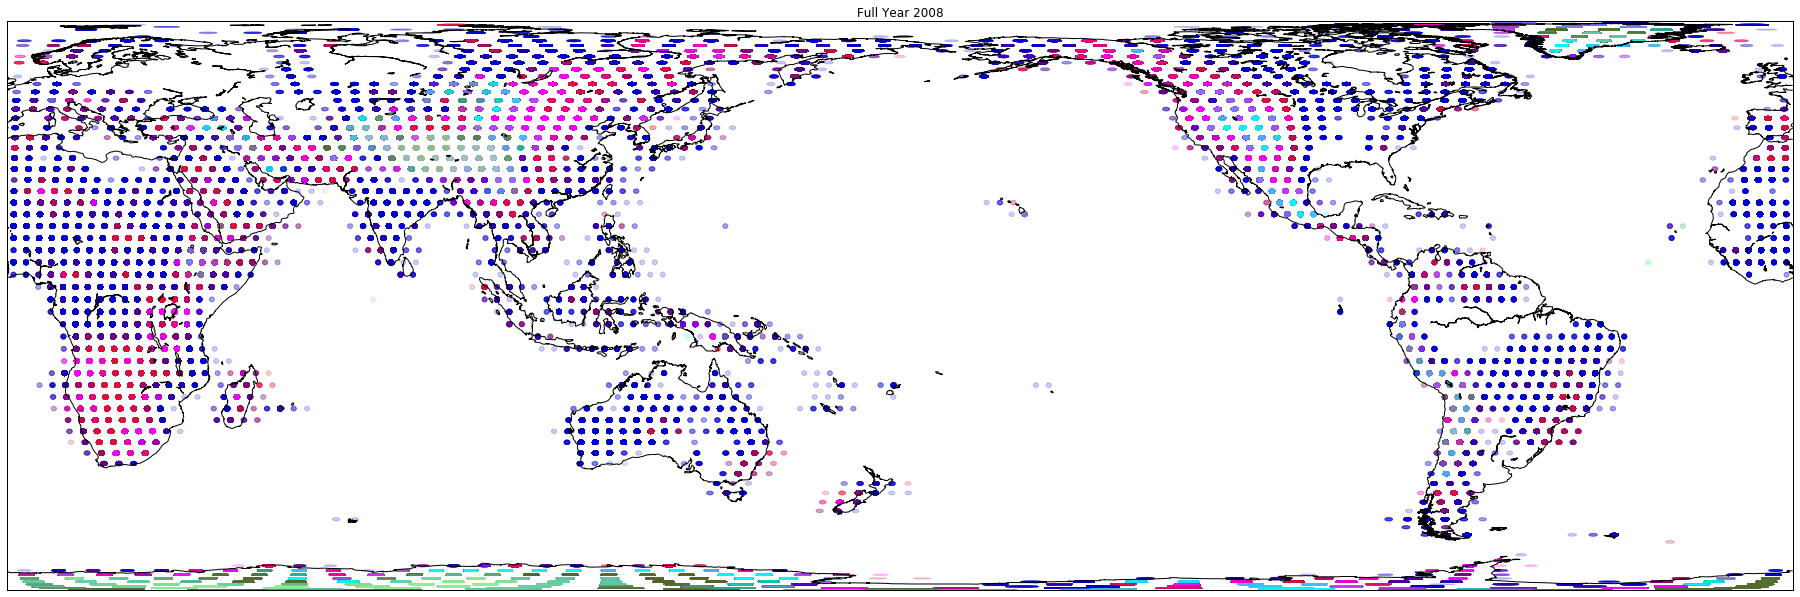

In [177]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
plt.figure(figsize=(32,65))
m = Basemap(projection='cea',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='white',lake_color='white')
# draw parallels and meridians.
# m.drawparallels(np.arange(-90.,91.,30.))
# m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='white')

# for i in xrange(100):
#     m.tissot(0,0,1.25,100, facecolor='yellow', alpha=0.1)

# m.tissot(10,0,1.25,100, facecolor='yellow', alpha=1)
# m.tissot(0,10,1.25,100, facecolor='yellow', alpha=1)

import pandas
# df = pandas.read_csv('/Users/lsxliron/Desktop/table1.csv')
df = pandas.read_csv('/Users/lsxliron/Desktop/coords.csv')


for i in xrange(0, len(X)):
    lat = df[df['GRD_BOX'] == (i%6596) + 1]['LAT_CENTER'].get_values()[0]-90
#     lon = df[df['GRD_BOX'] == (i%6596) + 1]['LON_CENTER'].get_values()[0]
    lon = df[df['GRD_BOX'] == (i%6596) + 1]['LON_CENTER'].get_values()[0]
#     index = df[df['GRD_BOX'] == (i%6596) + 1]['LAT_IND'].get_values()[0]

#     factor = 360.0/(df['LAT_IND']==index).value_counts().values[1]
    
#     print factor
#     lon = ((lon+factor)%360)-180
#     lon = lon - 360 + factor
#     print lat,lon
#     if lon>180:
#         lon -=360
#     print lat, lon
#     if lon==180:
#         lon=100
#     print lat, lon
#     if db.labels_[i] == 2:
#         col = 'red'
#     elif db.labels_[i] == 1:
#         col = 'green'
#     elif db.labels_[i] == 3:
#         col = 'blue'
#     elif db.labels_[i] == 4:
#         col = 'yellow'
#     elif db.labels_[i] == 5:
#         col = 'pink'
#     elif db.labels_[i] == 6:
#         col = 'aqua'
#     elif db.labels_[i] == 7:
#         col = 'black'
#     elif db.labels_[i] == 8:
#         col = 'black'
#     elif db.labels_[i] == 9:
#         col = 'black'
    if db.labels_[i] == -1:
        col = 'black'
    else:
        col = colors[db.labels_[i]]    
    if db.labels_[i] not in [-1,4]:
        m.tissot(lon, lat, 0.5, 100, facecolor=col, alpha=0.2, edgecolor=col)
#         m.tissot(lon, lat, 0.5, 100, facecolor='red', alpha=1.0, edgecolor='red')

plt.title("Full Year 2008")
# map.tissot(60, 1.25-90, 0.5, 100, facecolor='red', alpha=1, edgecolor='red')
# # map.tissot(180, 1.25-90, 0.5, 100, facecolor='red', alpha=1, edgecolor='red')
# map.tissot(-60, 1.25-90, 0.5, 100, facecolor='red', alpha=1, edgecolor='red')

# map.tissot(0, 1.25-90, 0.5, 100, facecolor='red', alpha=1, edgecolor='red') #60
# map.tissot(120, 1.25-90, 0.5, 100, facecolor='blue', alpha=1, edgecolor='blue') #120
# map.tissot(-120, 1.25-90, 0.5, 100, facecolor='green', alpha=1, edgecolor='green') #300
# 20, 60, 100, 140, 180, 
# 0, 40, 80, 120, 160, 
plt.show()


In [ ]:
"""
3    20
Name: LON_CENTER, dtype: float64
4    60
Name: LON_CENTER, dtype: float64
5    100
Name: LON_CENTER, dt ype: float64
6    140
Name: LON_CENTER, dtype: float64
7    180
Name: LON_CENTER, dtype: float64
8    220
Name: LON_CENTER, dtype: float64
9    260
Name: LON_CENTER, dtype: float64
10    300
Name: LON_CENTER, dtype: float64
11    340
Name: LON_CENTER, dtype: float64
"""

# SEND SMS

In [7]:
def sendSMS(text):
    from twilio.rest import TwilioRestClient
    # Find these values at https://twilio.com/user/account
    account_sid = "ACb862b159ac14143c89a89643a844e7e8"
    auth_token = "465ba0d27f8772b2cf646493f6b0d08f"
    client = TwilioRestClient(account_sid, auth_token)

    message = client.messages.create(to="+19174002767", from_="+13477323809",
                                         body=text)

In [8]:
sendSMS("DONE!")

In [176]:
np.save('labels2009R15N500MS20.npy', db.labels_)

In [ ]:
# import plotly.plotly as py
import plotly.graph_objs as go

n_clusters = len(set(db.labels_))
colors=[]
for i in xrange(n_clusters):
    rands = np.random.randint(0,255,size=3)
    colors.append('rgb({},{},{})'.format(rands[0], rands[1], rands[2]))
    
data = []
clusters = []
# colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(set(db.labels_))):
    name = str(i)
    color = colors[i]
    temp = np.array([z[j] for j in xrange(len(pointsLabelsToPlot)) if pointsLabelsToPlot[j] == i])
    if len(temp)>0 and i not in [-1,5]:
        xa = temp[:,0]
        ya = temp[:,1]
        za = temp[:,2]
        trace=dict(
            name = name,
            x = xa, 
            y = ya,
            z = za,
            type="scatter3d",
            mode="markers",
            marker = dict( size=3, color=color, line=dict(width=0) ) 
        )
        data.append( trace )

        cluster = dict(
            color = color,
            opacity = 0.3,
            type = "mesh3d",    
            x = xa, y = ya, z = za 
        )

        data.append( cluster )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='pandas-3d-scatter-iris', validate=False)

#  py.plot(fig, filename='pandas-3d-scatter-iris', validate=False)

In [96]:
colors

['rgb(173,144,136)',
 'rgb(206,144,37)',
 'rgb(162,186,21)',
 'rgb(251,38,118)',
 'rgb(251,148,71)',
 'rgb(235,217,30)',
 'rgb(208,27,123)',
 'rgb(21,77,67)',
 'rgb(114,220,4)',
 'rgb(134,102,13)',
 'rgb(85,29,9)',
 'rgb(233,214,42)',
 'rgb(168,202,26)',
 'rgb(226,127,244)',
 'rgb(220,34,7)',
 'rgb(161,165,168)',
 'rgb(225,26,224)',
 'rgb(185,141,247)',
 'rgb(218,167,227)',
 'rgb(218,164,86)',
 'rgb(98,157,124)',
 'rgb(226,65,46)',
 'rgb(7,220,30)',
 'rgb(222,239,140)',
 'rgb(25,99,50)',
 'rgb(218,48,20)',
 'rgb(115,117,179)']

In [22]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
df.head()

data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(df['Name'].unique())):
    name = df['Name'].unique()[i]
    color = colors[i]
    x = df[ df['Name'] == name ]['SepalLength']
    y = df[ df['Name'] == name ]['SepalWidth']
    z = df[ df['Name'] == name ]['PetalLength']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )
    
    cluster = dict(
        color = color,
        opacity = 0.3,
        type = "mesh3d",    
        x = x, y = y, z = z )
    data.append( cluster )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)

# IPython notebook
# py.iplot(fig, filename='pandas-3d-scatter-iris', validate=False)

url = py.plot(fig, filename='pandas-3d-scatter-iris', validate=False)

# CYL  PROJECTION

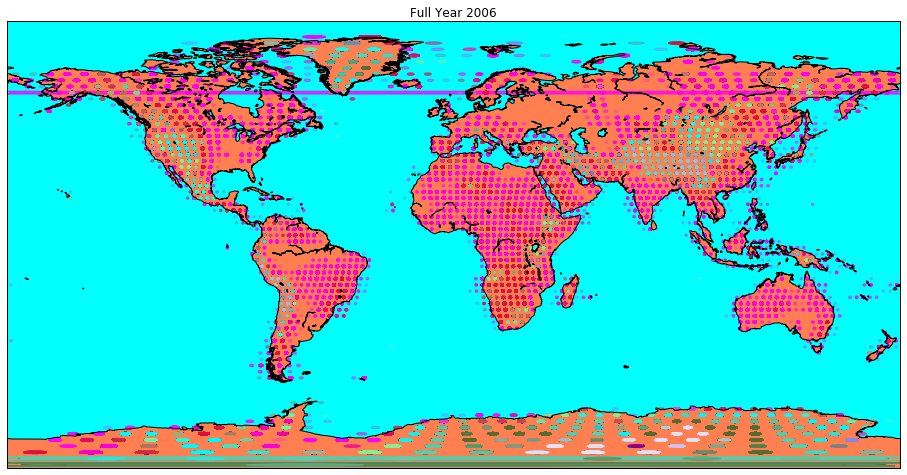

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='cyl', resolution='l')
plt.figure(figsize=(16,65))
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()


import pandas
df = pandas.read_csv('/Users/lsxliron/Desktop/table1.csv')

for i in xrange(0, len(X)):
    lat = df[df['GRD_BOX'] == (i)%6596 + 1]['LAT_CENTER'].get_values()[0]-90
    lon = df[df['GRD_BOX'] == (i)%6596 + 1]['LON_CENTER'].get_values()[0]
    if lon > 180:
        lon -=360

        
#     if db.labels_[i] == 2:
#         col = 'red'
#     elif db.labels_[i] == 1:
#         col = 'green'
#     elif db.labels_[i] == 3:
#         col = 'blue'
#     elif db.labels_[i] == 4:
#         col = 'yellow'
#     elif db.labels_[i] == 5:
#         col = 'pink'
#     elif db.labels_[i] == 6:
#         col = 'aqua'
#     elif db.labels_[i] == 7:
#         col = 'black'
#     elif db.labels_[i] == 8:
#         col = 'black'
#     elif db.labels_[i] == 9:
#         col = 'black'
    if db.labels_[i] == -1:
        col = 'black'
    else:
        col = colors[db.labels_[i]]    
    if db.labels_[i] not in [-1,5]:
        map.tissot(lon, lat, 0.5, 100, facecolor=col, alpha=0.2, edgecolor=col)

plt.title("Full Year 2006")

plt.show()
# map.tissot(0, 0, 0.5, 100, facecolor='red', alpha=1, edgecolor='red')

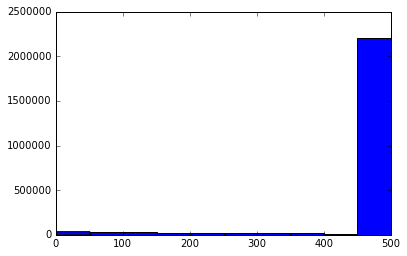

In [174]:
temp = [len(x) for x in neighborhoods]
# r = np.ravel(neighborhoods[0:1000])
# len(r)
a = plt.hist(temp, bins=10)

In [157]:
np.where(a[0] == a[0].max())

(array([54, 63, 65]),)

In [167]:
temp

[500,
 500,
 500,
 500,
 500,
 500,
 500,
 461,
 416,
 500,
 423,
 357,
 444,
 376,
 465,
 351,
 500,
 500,
 500,
 207,
 500,
 241,
 179,
 500,
 281,
 500,
 178,
 260,
 387,
 500,
 458,
 359,
 500,
 446,
 500,
 500,
 500,
 192,
 500,
 500,
 500,
 137,
 208,
 500,
 130,
 278,
 253,
 202,
 149,
 260,
 240,
 500,
 500,
 500,
 500,
 500,
 399,
 500,
 500,
 285,
 423,
 500,
 470,
 500,
 500,
 500,
 103,
 169,
 213,
 434,
 137,
 69,
 322,
 232,
 16,
 136,
 94,
 86,
 216,
 478,
 500,
 500,
 425,
 500,
 500,
 500,
 473,
 302,
 498,
 224,
 294,
 224,
 358,
 66,
 500,
 500,
 500,
 500,
 91,
 149]